# Forecasting stock prices for 2020 Q4

In this project I will be forecasting the stock price for the following symbols for the fourth quarter of 2020:
* Apple (AAPL)
* Microsoft (MSFT)
* Amazon (AMZN)
* Google (GOOGL)
* Facebook (FB)
* Wells Fargo (WFC)
* Bank of America (BAC)
* Genral Dynamics (GD)
* Lockheed Martin (LMT)
* Boeing (BA)

### Getting the Data
First, I will use the package *yfinance* to extract the historical prices of the tickers available within Yahoo Finance:

In [17]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [145]:
# We download the data of the 10 tickers for the last 20 years (or the most years available for new publicly traded companies)
ticker_list = "AAPL MSFT AMZN GOOGL FB WFC BAC GD LMT BA"
data = yf.download(ticker_list, start='2000-01-01', end='2020-10-02')

# Sort the data by date
data.sort_values('Date', inplace=True, ascending=True)

[*********************100%***********************]  10 of 10 completed


In [80]:
# For visualizing purposes we only want to keep the adjusted close prices of the 10 tickers
prices = data['Adj Close']
prices.head(10)

,AAPL,AMZN,BA,BAC,FB,GD,GOOGL,LMT,MSFT,WFC
Date,,,,,,,,,,
2000-01-03,0.863657,89.3750,25.741438,14.108747,NaN,15.990134,NaN,12.000444,37.199776,10.876109
2000-01-04,0.790842,81.9375,25.701408,13.271327,NaN,16.662323,NaN,12.407867,35.943153,10.337516
2000-01-05,0.802415,69.7500,27.302753,13.416966,NaN,17.803020,NaN,12.481941,36.322121,10.233269
2000-01-06,0.732975,65.5625,27.582977,14.563879,NaN,17.864136,NaN,12.667136,35.105415,10.684997
2000-01-07,0.767695,69.5625,28.383648,14.181568,NaN,18.332638,NaN,12.704171,35.564171,10.876109
2000-01-10,0.754193,69.1875,27.983307,13.690042,NaN,18.169676,NaN,12.222675,35.823463,10.528628
2000-01-11,0.715615,66.7500,27.462879,13.398764,NaN,17.925241,NaN,11.815248,34.905945,10.354881
2000-01-12,0.672698,63.5625,27.582977,13.544403,NaN,17.349123,NaN,12.556021,33.769020,10.650248
2000-01-13,0.746477,65.9375,27.142611,13.853884,NaN,17.349123,NaN,12.296748,34.407299,11.240958


### Plotting the data
Now that we have extracted the relevant data, we see that two of our companies have less data available than the rest. Google and Facebook went public way after 2000, hence they have NaNs for the first few years of data. We now will be visualizing how the stock price of our tickers has evolved across time, identifying each company's sector to see if they move similarly within sector.

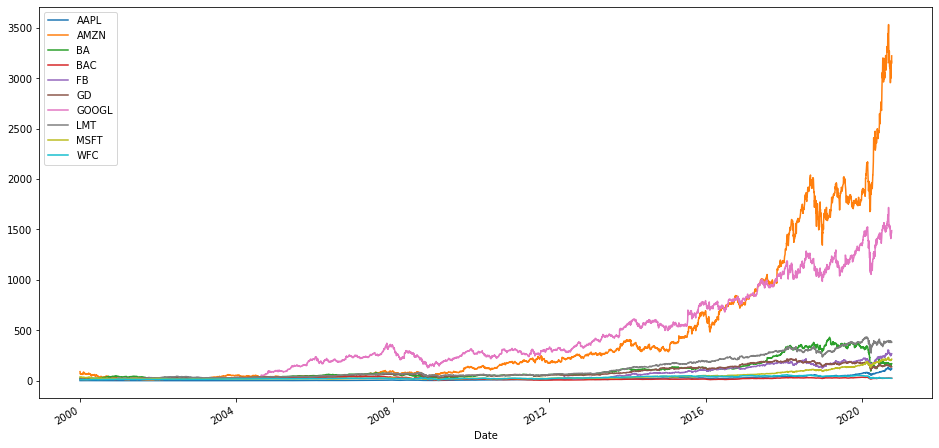

In [30]:
prices.plot(figsize=(16, 8)) #plot the whole dataset

Text(0.5, 1.0, 'Internet Services & Tech')

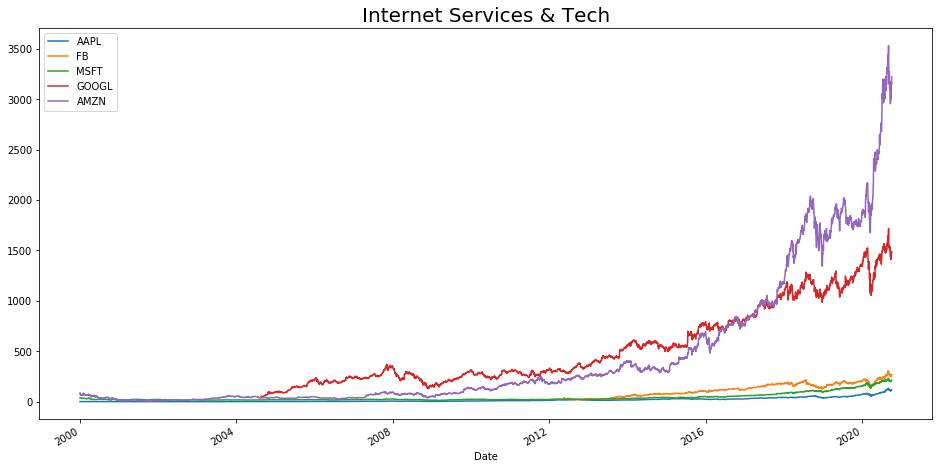

In [41]:
prices[['AAPL','FB','MSFT','GOOGL', 'AMZN']].plot(figsize=(16, 8))
plt.title('Internet Services & Tech', fontsize=20)
# we plot only the stock prices of tech firms

Text(0.5, 1.0, 'Banks')

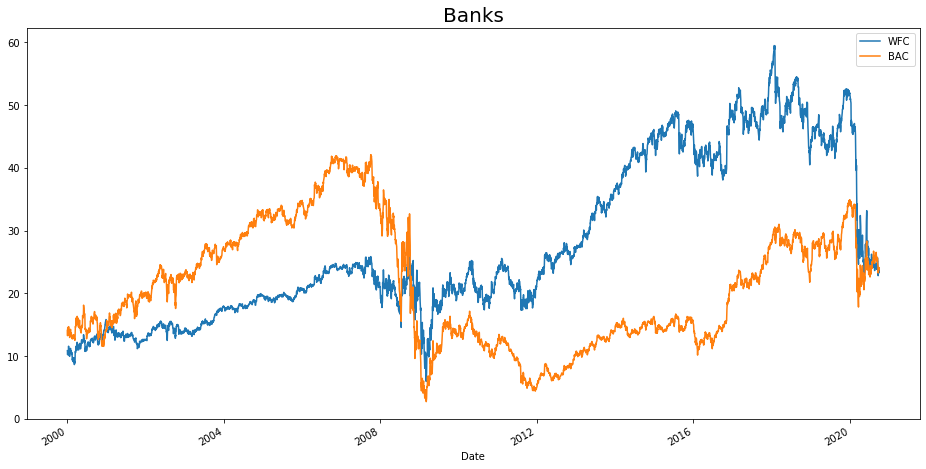

In [40]:
prices[['WFC','BAC']].plot(figsize=(16, 8))
plt.title('Banks', fontsize=20)
# plot banks' stock prices

Text(0.5, 1.0, 'Aerospacial & Defense Industries')

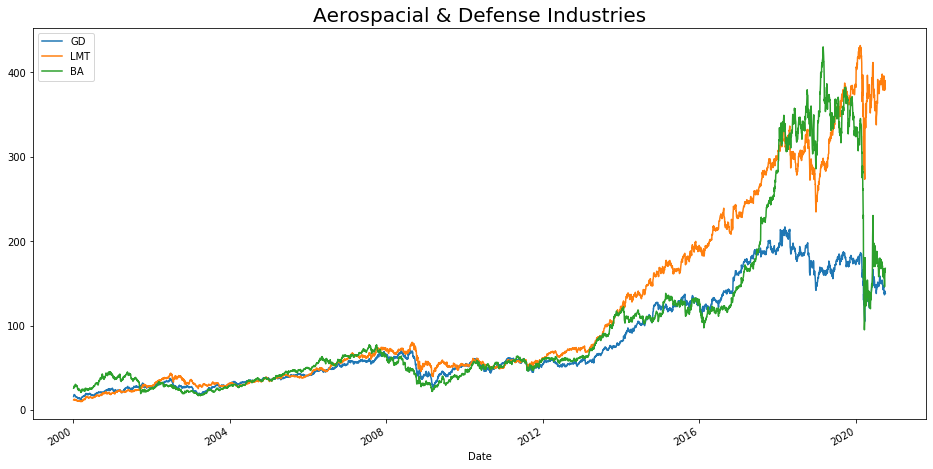

In [39]:
prices[['GD','LMT','BA']].plot(figsize=(16, 8))
plt.title('Aerospacial & Defense Industries', fontsize=20)
#plot aerospacial industry firms' stock prices

### Processing the data
Now that we have visualized the behavior of this 10 stock prices across the years we see that even compared with similar firms in the same industry the stock prices seem to move pretty randomly. The processes generating these time series are clearly not stationary and, from the plots, seem to have a stochastic trend. This is an indication that to make a good predict we may have to difference the data to remove this trend. Thus, we will apply a log-transformation to the stock price and then difference it to obtain the log-return:

In [112]:
import numpy as np

returns = []
tickerlist = ['AAPL','MSFT','AMZN','GOOGL','FB','WFC','BAC','GD','LMT','BA']
for ticker in tickerlist:
    ret = np.log(prices[ticker]).diff()
    returns.append(ret)
## we apply to each column of the df a log-return transformation
returns = pd.DataFrame(returns)
returns = returns.transpose()
returns.head()

,AAPL,MSFT,AMZN,GOOGL,FB,WFC,BAC,GD,LMT,BA
Date,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.088078,-0.034364,-0.086884,NaN,NaN,-0.050789,-0.061189,0.041178,0.033387,-0.001556
2000-01-05,0.014528,0.010488,-0.161039,NaN,NaN,-0.010136,0.010914,0.066218,0.005952,0.060442
2000-01-06,-0.090514,-0.034072,-0.061914,NaN,NaN,0.043197,0.082024,0.003427,0.014728,0.010211
2000-01-07,0.046281,0.012983,0.059222,NaN,NaN,0.017728,-0.026601,0.025888,0.002919,0.028614


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FBE4BB3408>,
      dtype=object)

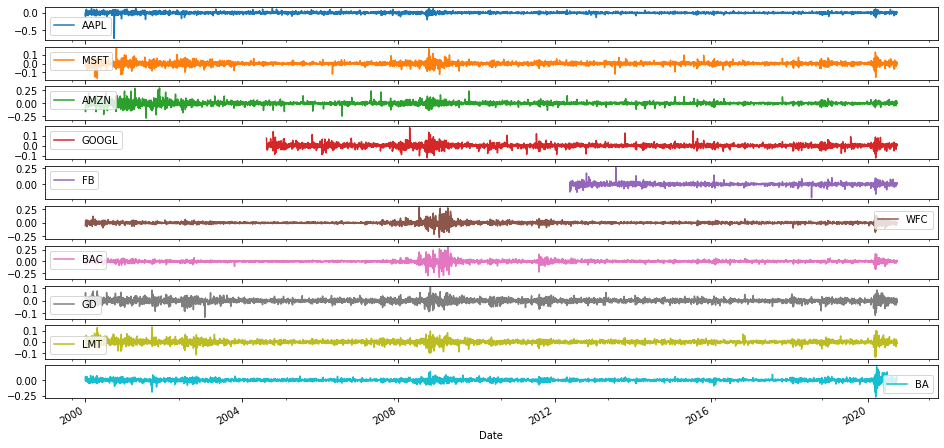

In [116]:
returns.plot(subplots=True, figsize=(16, 8)) # we plot the log returns for the whole dataset

Once we have plotted the log-returns we see that the process is now looking more like a stationary process, except for the fact that there are some periods with significantly larger variance, where large variance periods seem to follow large variance periods, and small variance periods follow small variance periods. Particularly in crisis periods, as can be seen in the high volatility in the period after the 2008 crisis and during the Covid-19 pandemic. \
This behavior is called volatility clustering, and to account for it in the model chosen to forecast this time series I'll be using a GARCH model to model the volatility of the returns while modelling the returns with an ARMA process to allow the conditional mean of the process to vary and account for autocorrelation. To estimate the parameters of both models jointly and avoid inconsistency of the estimators I will be using the rugarch package in R, which is not available in python, hence the model estimation will be made in an R Notebook attached in this link: https://github.com/alejandrosantiag0/stock-forecasting-2020/blob/main/model%20estimation.Rmd. \
The data already processed here will be used as input for the estimation of the models in the R Notebook.

In [117]:
returns.to_csv('returns.csv') # we export the processed data to be used for model estimation in R

### Results
Once we estimated different models to predict the log-return of out stocks, we can analyze these results by looking at the predictions (we import the csv file created in R).

In [131]:
predictions = pd.read_csv('predicted returns.csv', index_col=0) 
predictions['Date'] = pd.bdate_range(start='10/2/2020', end='1/1/2021') # assign business date to the predictions made
predictions.set_index('Date', inplace=True)
predictions.head()

,AAPL,MSFT,AMZN,GOOGL,FB,WFC,BAC,GD,LMT,BA
Date,,,,,,,,,,
2020-10-02,0.000109,0.000103,0.000566,0.002091,-0.000341,0.001441,0.000147,0.000782,0.001644,-0.001519
2020-10-05,0.001129,0.000690,0.000909,0.000023,0.000798,0.001064,0.000055,0.000727,0.001082,-0.001043
2020-10-06,0.003048,0.000713,0.001522,0.000413,0.000393,0.000929,-0.000606,0.000679,0.000942,-0.000171
2020-10-07,0.003541,0.000714,0.000545,0.002359,0.001484,0.000824,0.000353,0.000682,0.000906,0.000664
2020-10-08,0.002678,0.000714,0.000920,0.001411,0.001242,0.000745,0.001403,0.000683,0.000897,0.001123


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FBE5B0BB48>,
      dtype=object)

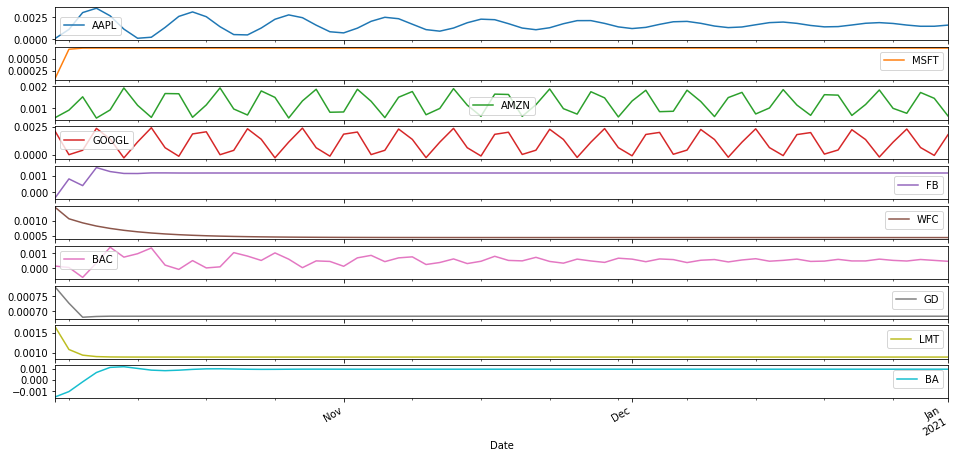

In [132]:
predictions.plot(subplots=True, figsize=(16, 8)) # plot the predictions made with our models

Analyzing the plots of the predicted log returns for the 66 working days (between 10-01-2020 and 01-01-2021) left for the year we see that some of the predictions revert very quickly to a certain level (probably the mean of the process). This is explained by the differences in parameters picked by our model selection algorithm which calculated the best fitting AR and MA orders using the 'auto.arima' function in the *forecast* package of R and then simultaneously estimated the ARMA(p,q) and GARCH(1,1) parameters with maximum likelihood estimation implemented by the *rugarch* package.

Now we shall apply a transformation to the log return predicted data to obtain the predicted stock prices, which were the initial variable we wanted to predict. This will be done applying the following formula: (price in t0)\*cumulative product[exp(log returns)]

In [193]:
predicted_prices = np.exp(predictions) # exponentiate every log return
predicted_prices = predicted_prices.cumprod() # calculate the cumulative product on each date
predicted_prices = predicted_prices[prices.columns.values]
predicted_prices.head()

,AAPL,AMZN,BA,BAC,FB,GD,GOOGL,LMT,MSFT,WFC
Date,,,,,,,,,,
2020-10-02,1.000109,1.000566,0.998482,1.000147,0.999659,1.000782,1.002094,1.001645,1.000103,1.001442
2020-10-05,1.001239,1.001476,0.997441,1.000202,1.000458,1.001510,1.002116,1.002730,1.000793,1.002509
2020-10-06,1.004296,1.003001,0.997270,0.999596,1.000851,1.002190,1.002530,1.003675,1.001506,1.003441
2020-10-07,1.007859,1.003548,0.997932,0.999949,1.002337,1.002874,1.004898,1.004585,1.002221,1.004268
2020-10-08,1.010561,1.004472,0.999054,1.001352,1.003583,1.003559,1.006317,1.005487,1.002937,1.005017


In [194]:
lastprice = np.array(prices.iloc[[-1]]) # get the last price for each ticker as np array
predicted_prices *= lastprice # multiply every column by its corresponding last price
predicted_prices.head()

,AAPL,AMZN,BA,BAC,FB,GD,GOOGL,LMT,MSFT,WFC
Date,,,,,,,,,,
2020-10-02,116.802743,3223.083004,167.605201,24.103541,266.539191,138.328101,1491.014964,381.516619,212.481818,23.593984
2020-10-05,116.934678,3226.014301,167.430428,24.104858,266.752069,138.428689,1491.048823,381.929834,212.628443,23.619113
2020-10-06,117.291678,3230.928371,167.401757,24.090265,266.856840,138.522744,1491.664817,382.289639,212.780028,23.641068
2020-10-07,117.707798,3232.690019,167.512866,24.098761,267.253230,138.617223,1495.187793,382.636252,212.931910,23.660559
2020-10-08,118.023414,3235.664795,167.701166,24.132591,267.585405,138.711898,1497.299207,382.979781,213.083908,23.678199


In [196]:
final_plot_data = [prices[-200:],predicted_prices]
final_plot_data = pd.concat(final_plot_data, ignore_index=False) # concatenate the data of the predictions with the last 200 days of historic prices to plot it

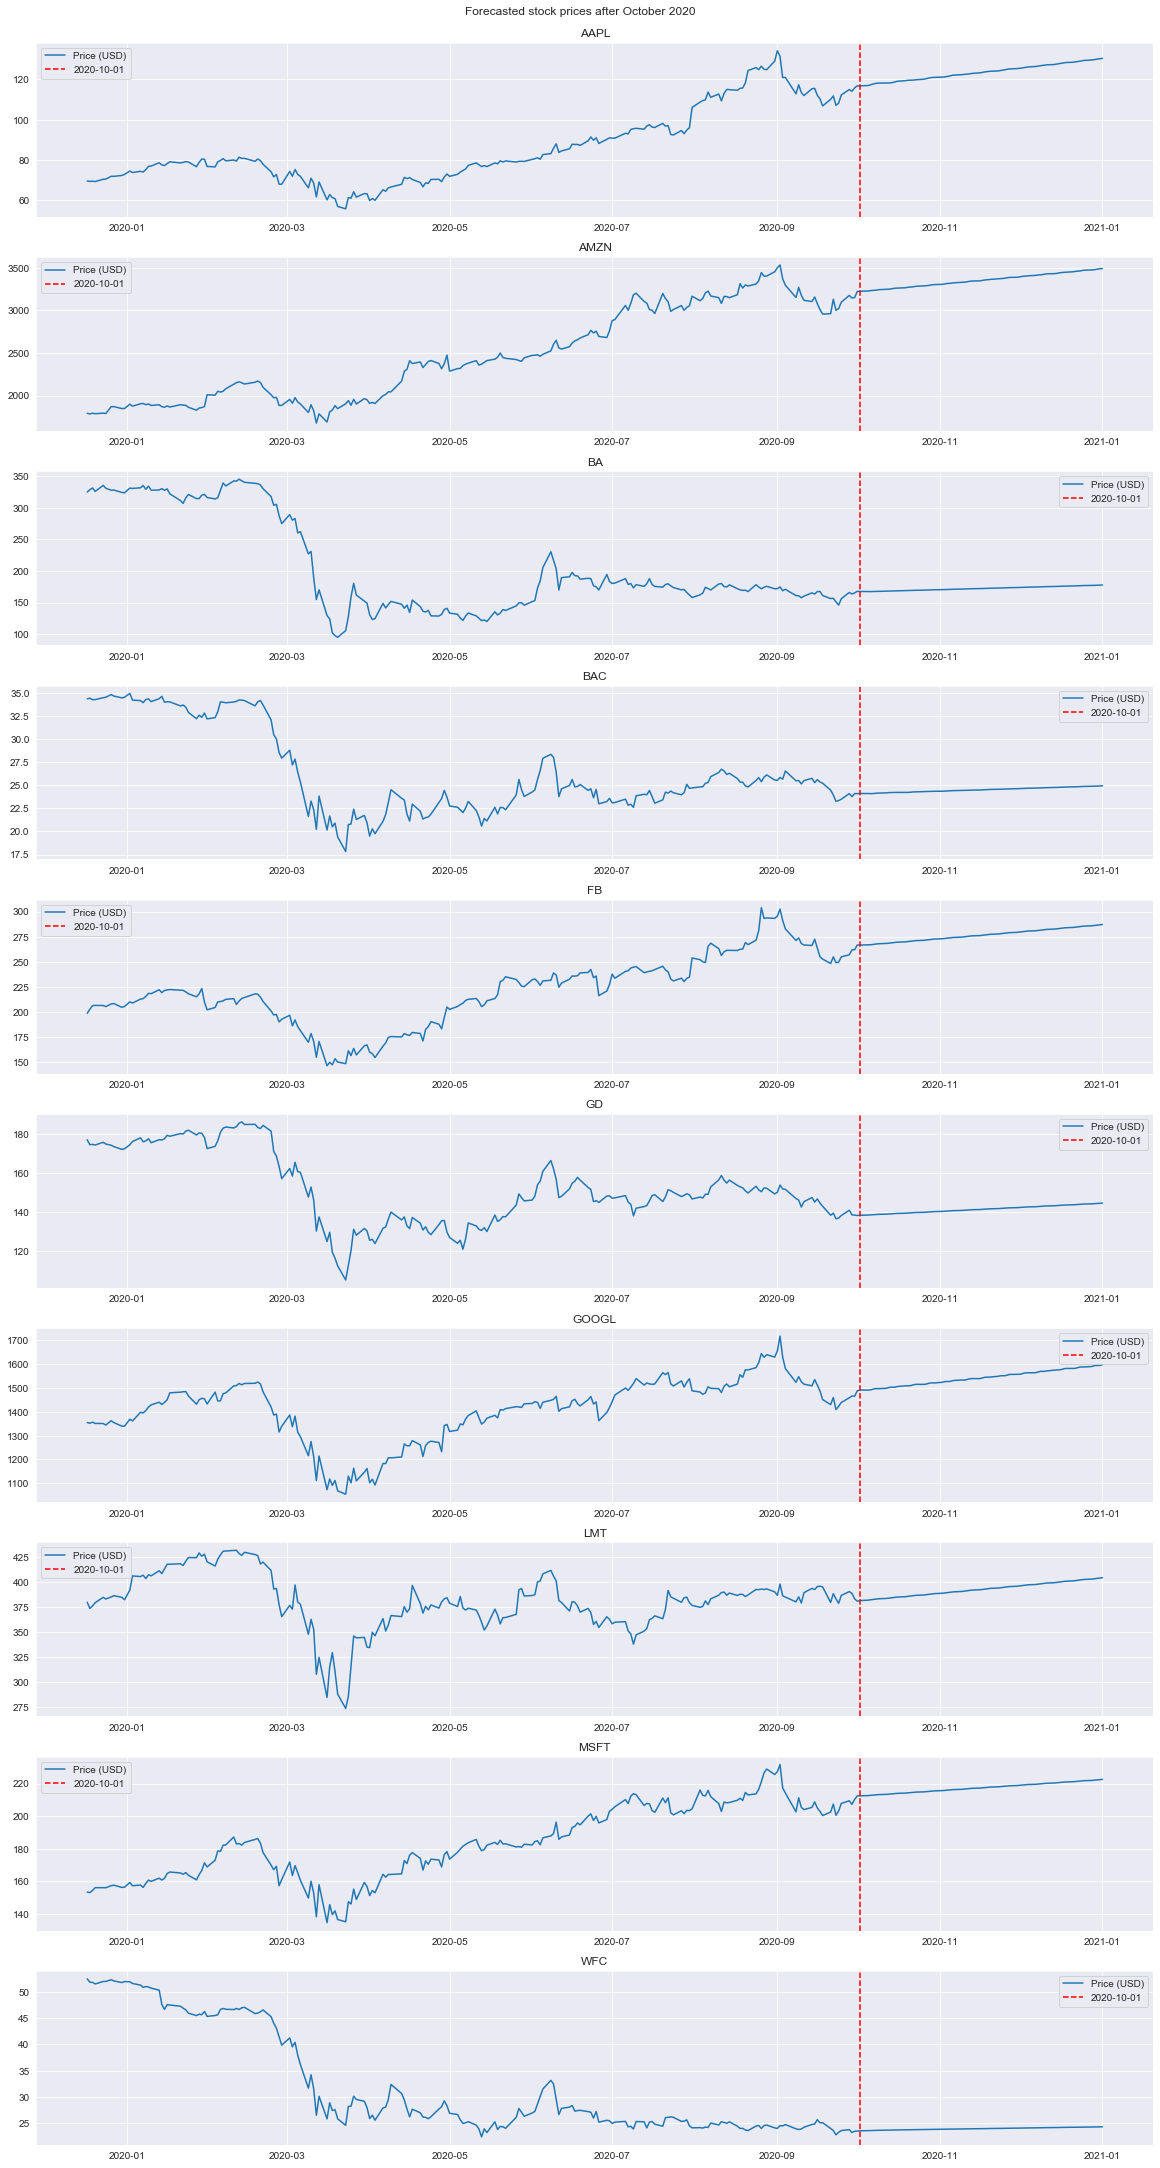

In [234]:
import seaborn as sns
sns.set_style('darkgrid')
mark = final_plot_data.index.values[200]
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(16, 30), constrained_layout = True) # plot the predictions made with our models
for i in range(10):
    ax[i].plot(final_plot_data.iloc[:,i], label= 'Price (USD)')
    ax[i].axvline(mark, color='red', label = '2020-10-01', linestyle='--')
    ax[i].legend(loc='best')
    ax[i].title.set_text(final_plot_data.columns[i])
fig.suptitle('Forecasted stock prices after October 2020', fontsize=12)
plt.show() # in this code I plot the prediction of our models along with the past historical price

### Factors considered and not considered

As I previously mentioned the algorithm to select the adequate model for each stock price incorporates the removal of the stochastic trend by differencing and applying log to the data. Nevertheless, this not necessarily makes the process stationary (as one would want in order to adequately fit an ARMA model) because the variance still exhibits dependance over time (aka volatility clustering), this is why we also simultaneously model the error term of the ARMA process as a GARCH process. \
The disadvantage here could be that the model is overfitted, as the order selection of the ARMA parameters is based solely on the AIC calculated with in-sample data. We do not test the out-of-sample performance because the process of fitting the model and calculating a metric to evaluate out of sample performance would make the model selection loop considerably much slower compared to just using the AIC in the auto.arima function. \
Another disadvantage of the models of the ARMA family is that they have relatively short memory (this is part of the reason that the prediction of the returns reverses to the mean quickly), this could be addressed using other types of models that could incorporate longer memory, such as the LSTM (Long Short Term Memory) recurrent neural networks. \
Also, in order to make the predictions I didn't used more information besides the historical price of each stock. Thus, the information of exogenous shocks that could alter significantly the stock price is incorporated only through past observations of the stock price. We could try to add more macroeconomic state variables to the model via an ARIMAX approach, but I decided to stick with just the historical price for the model to be more parsimonious. \
Lastly, it's important to consider the purpose of the predictions done in this exercise, since if we were to implement only a Buy/Sell/Hold strategy we would not be so concerned about the exact price of the stock, but rather on a binary outcome of whether its price is going up or down and thus if we are to take a long or short position. This type of binary outcome can be much more accurately predicted by the previously mentioned recurrent neural networks or other machine learning algorithms like Decision Trees or Support Vector Machines, that could be worth exploring, depending on the financial strategy that we are interested in undertaking.